# Hoja de Trabajo 1 - Entrega #1 del Proyecto
Diego Duarte 22075 - José Marchena 22398

### Importamos las librerias necesarias y leemos los datos del csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import analisis

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
movies=pd.read_csv("movies.csv", encoding="ISO-8859-1")

#### 1. (3 puntos) Haga una exploración rápida de sus datos, para eso haga un resumen de su conjunto de datos.

In [2]:
movies['castWomenAmount'] = pd.to_numeric(movies['castWomenAmount'], errors='coerce')
movies['castMenAmount'] = pd.to_numeric(movies['castMenAmount'], errors='coerce')
movies['castWomenAmount'] = movies['castWomenAmount'].astype(float)
movies['castMenAmount'] = movies['castMenAmount'].astype(float)
movies = movies.dropna(subset=['castWomenAmount', 'castMenAmount'])
# Se convirtieron algunos datos numericos ya que por errores de la database, no permitia hacer un describe

print(movies.describe())

                  id        budget       revenue      runtime    popularity  \
count    9838.000000  9.838000e+03  9.838000e+03  9838.000000   9838.000000   
mean   244750.172088  1.883274e+07  5.762405e+07   100.939317     51.592854   
std    254676.542333  3.681847e+07  1.506116e+08    26.803554    218.427093   
min         5.000000  0.000000e+00  0.000000e+00     0.000000      4.258000   
25%     12139.250000  0.000000e+00  0.000000e+00    90.000000     14.551750   
50%    137100.000000  9.050000e+05  3.291610e+05   100.000000     21.842000   
75%    446305.250000  2.100000e+07  4.619692e+07   113.000000     40.640500   
max    922260.000000  3.800000e+08  2.847246e+09   750.000000  11474.647000   

           voteAvg     voteCount  genresAmount  productionCoAmount  \
count  9838.000000   9838.000000   9838.000000         9838.000000   
mean      6.491462   1364.069018      2.608457            3.127668   
std       0.958335   2579.594831      1.133813            2.257934   
min     

 
#### 2. (5 puntos) Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta) 

In [3]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9838 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9838 non-null   int64  
 1   budget                     9838 non-null   int64  
 2   genres                     9832 non-null   object 
 3   homePage                   4168 non-null   object 
 4   productionCompany          9543 non-null   object 
 5   productionCompanyCountry   8720 non-null   object 
 6   productionCountry          9757 non-null   object 
 7   revenue                    9838 non-null   float64
 8   runtime                    9838 non-null   int64  
 9   video                      9359 non-null   object 
 10  director                   9807 non-null   object 
 11  actors                     9793 non-null   object 
 12  actorsPopularity           9790 non-null   object 
 13  actorsCharacter            9800 non-null   object 
 1

#### 3. (6 puntos) Investigue si las variables cuantitativas siguen una distribución normal y haga una tabla de frecuencias de las variables cualitativas. Explique todos los resultados. 

In [4]:
#Importamos la libreria donde se encuentra las funciones
import analisis

#Creamos listas para los diferentes tipos de datos
cuantitiativos = movies.select_dtypes(include=['int64', 'float64']).columns.tolist()
cuantitiativos.remove("id") #No nos importa id ya que solo es un identificador de las peliculas

cualitativos = movies.select_dtypes(include=['object']).columns.tolist()
cualitativos.remove("actorsPopularity") 

In [5]:

for col in cuantitiativos:
    print("***" + col + "***")
    analisis.prueba_de_normalidad(movies[col],col)
    print("\n")

***budget***
Estadístico de prueba (ks_statistic) = 0.30449054959108351470
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'budget' NO provienen de una distribución normal.



***revenue***
Estadístico de prueba (ks_statistic) = 0.35100083951604893473
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'revenue' NO provienen de una distribución normal.



***runtime***
Estadístico de prueba (ks_statistic) = 0.13635880862487861909
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'runtime' NO provienen de una distribución normal.



***popularity***
Estadístico de prueba (ks_statistic) = 0.41776867731518868565
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'popularity' NO provienen de una distribución normal.



***voteAvg***
Estadístico de prueba (ks_statistic) = 0.04220486550201635323
p-value = 0.00000000000000115349
Se rechaza la hipótesis nula: los datos de 'voteAvg' NO provien

In [6]:
for col in cualitativos:
    print("***" + col + "***")
    analisis.frecuencias(movies[col])
    print("\n")

***genres***
                                                    Frecuencia  Porcentaje
genres                                                                    
Drama                                                      517    5.258340
Comedy                                                     433    4.403987
Horror                                                     221    2.247762
Drama|Romance                                              206    2.095199
Horror|Thriller                                            205    2.085028
Comedy|Romance                                             200    2.034174
Documentary                                                171    1.739219
Comedy|Drama                                               140    1.423922
Action|Thriller                                            121    1.230675
Action                                                     111    1.128967
Comedy|Drama|Romance                                       106    1.078112
Drama|Thrill

### Preguntas

In [7]:
#importamos el archivo .py donde tenemos las funciones
import preguntas

#### a. (3 puntos) ¿Cuáles son las 10 películas que contaron con más presupuesto? 

In [8]:
preguntas.top_10_budget_movies(movies)

                                            title     budget
716   Pirates of the Caribbean: On Stranger Tides  380000000
4710                      Avengers: Age of Ultron  365000000
5952                            Avengers: Endgame  356000000
4953                               Justice League  300000000
5953                       Avengers: Infinity War  300000000
163      Pirates of the Caribbean: At World's End  300000000
607                              Superman Returns  270000000
7134                                The Lion King  260000000
3791                                      Tangled  260000000
280                                  Spider-Man 3  258000000


#### b. (3 puntos) ¿Cuáles son las 10 películas que más ingresos tuvieron? 

In [9]:
preguntas.top_10_revenue_movies(movies)

                             title       revenue
3210                        Avatar  2.847246e+09
5952             Avengers: Endgame  2.797801e+09
307                        Titanic  2.187464e+09
4947  Star Wars: The Force Awakens  2.068224e+09
5953        Avengers: Infinity War  2.046240e+09
4914                Jurassic World  1.671713e+09
7134                 The Lion King  1.667635e+09
9049       Spider-Man: No Way Home  1.631853e+09
3397                  The Avengers  1.518816e+09
5087                     Furious 7  1.515048e+09


#### f. (9 puntos) ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. ¿A qué género principal pertenecen las películas más largas? 

f.1) Género principal en 20 peliculas mas recientes

Géneros en las 20 películas más recientes:
 genres
Drama              15
Horror              7
Fantasy             5
Comedy              5
Science Fiction     4
Adventure           3
Thriller            3
War                 3
Crime               2
History             2
Action              2
Romance             1
Mystery             1
Animation           1
Family              1
Name: count, dtype: int64
f.2) Género predominante en el conjunto de datos

Género principal: 
 genres
Drama    3766
Name: count, dtype: int64


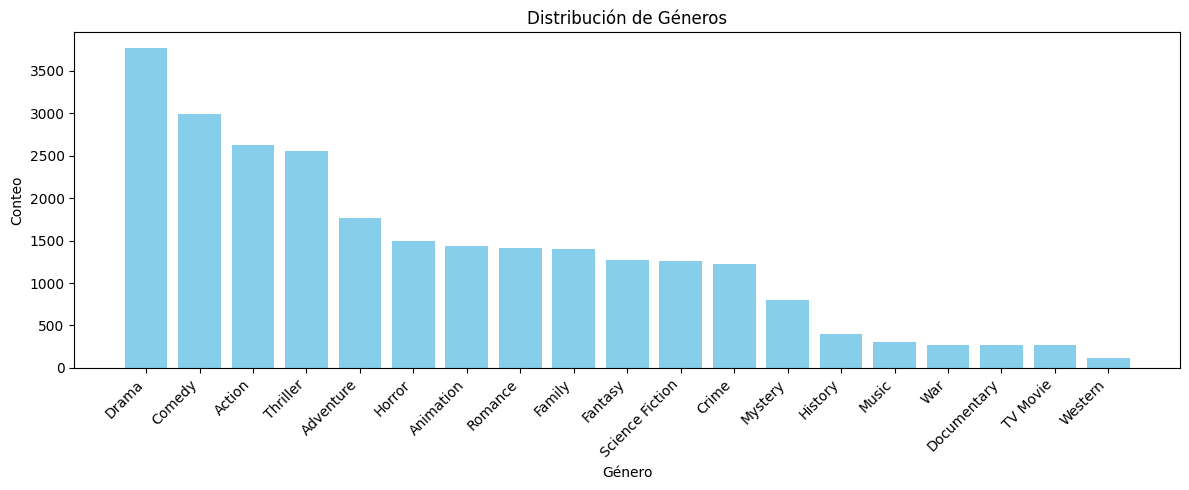

f.3) Género principal de películas más grandes

Géneros en 20 películas más populares: 
 genres
Drama              11
Comedy              8
Crime               3
Romance             3
Action              3
Thriller            2
Documentary         2
Music               2
Horror              2
Science Fiction     2
History             1
Family              1
TV Movie            1
Adventure           1
Fantasy             1
Name: count, dtype: int64


In [10]:
print("f.1) Género principal en 20 peliculas mas recientes\n")
preguntas.recent_genre(movies)

print("f.2) Género predominante en el conjunto de datos\n")
preguntas.popular_genre(movies)

print("f.3) Género principal de películas más grandes\n")
preguntas.top_genre(movies)

#### g. (8 puntos) ¿Las películas de qué genero principal obtuvieron mayores ganancias?

In [11]:
print("Para las top 50 películas, estas fueron los géneros y su respectiva ganancia\n")
preguntas.genre_revenue(movies)

Para las top 50 películas, estas fueron los géneros y su respectiva ganancia

              genre    revenueSum
1         Adventure  2.549982e+11
0            Action  2.467053e+11
10           Comedy  1.814760e+11
4             Drama  1.649610e+11
2           Fantasy  1.317465e+11
6          Thriller  1.287879e+11
3   Science Fiction  1.235042e+11
7            Family  1.209235e+11
8         Animation  8.696351e+10
5           Romance  7.220950e+10
9             Crime  6.262440e+10


c:\Users\JM\Documents\Data Mining\AnalisisExploratorio\preguntas.py:95: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gen_revenue = pd.concat([gen_revenue, tem],ignore_index=True)


#### h. (3 puntos) ¿La cantidad de actores influye en los ingresos de las películas? ¿Se han hecho películas con más actores en los últimos años? 

c:\Users\JM\Documents\Data Mining\AnalisisExploratorio\preguntas.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['releaseDate'] = pd.to_datetime(df2['releaseDate'],errors='coerce').dt.year


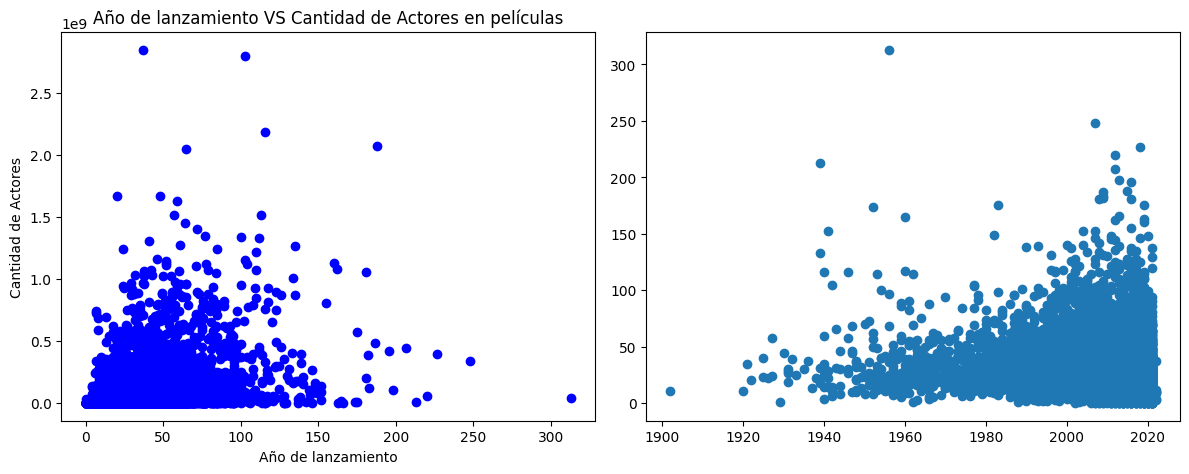

In [12]:
preguntas.actor_amount_influence(movies)



#### i. (3 puntos) ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas? 

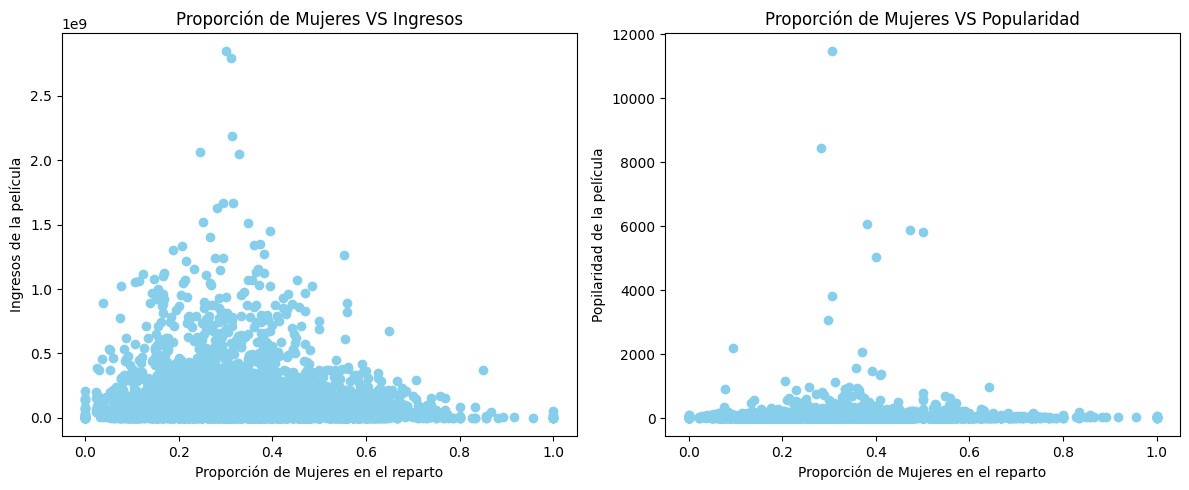

In [13]:
preguntas.gender_proportion(movies)

#### j. (8 puntos) ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas? 

In [14]:
preguntas.best_directors(movies)

9990       Miguel Angel Zavala
9246             Rebecca Sugar
9733            Christin Baker
8632              Thomas Coven
9347              Kaku Arakawa
6885              Dave Bullock
6885             Troy Adomitis
6885               Victor Cook
6170              Samuel Leong
9368            Won Myeong-jun
9756            Haruo Sotozaki
9777              Igor Kopylov
9451              Park Jun-soo
8265           Ulises Valencia
9219              Kim Nam-joon
9219            Jeon Jung-kook
9219             Kim Tae-hyung
9219               Park Ji-min
9219              Jung Ho-seok
9219              Kim Seok-jin
9219               Min Yoon-gi
9541                       NaN
8226            Cybil Richards
6303            Filip Ghiorghi
9648    Preston A. Whitmore II
5817            Michael Goguen
Name: director, dtype: object


#### k. (8 puntos) ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión 

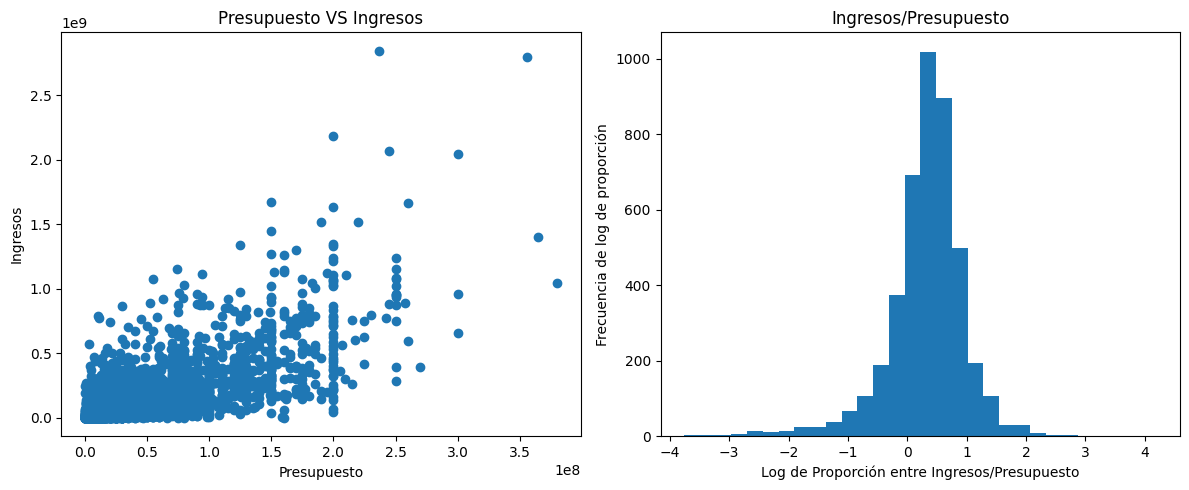

In [15]:
preguntas.revenue_budget(movies)

#### L. (5 puntos) ¿Se asocian ciertos meses de lanzamiento con mejores ingresos? 

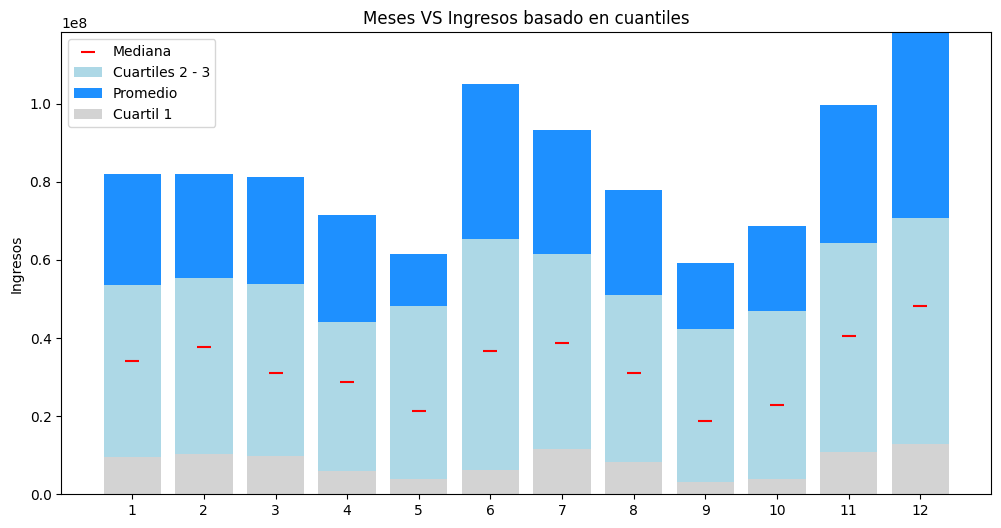

In [16]:
preguntas.months_revenue(movies)

#### m. (6 puntos) ¿En qué meses se han visto los lanzamientos con mejores ingresos ¿Cuántas películas, en promedio, se han lanzado por mes? 

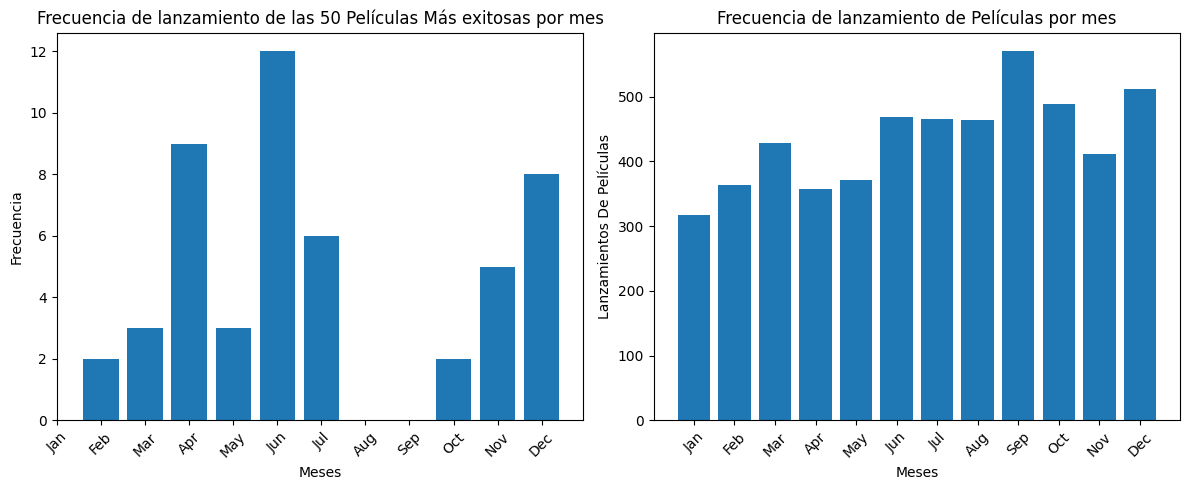

In [17]:
preguntas.month_releases(movies)


#### n. (7 puntos) ¿Cómo se correlacionan las calificaciones con el éxito comercial? 

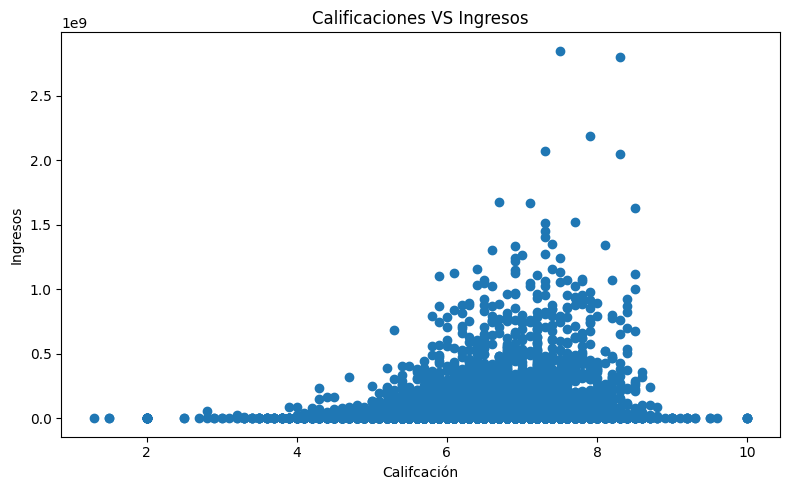

In [18]:
preguntas.rating_revenue(movies)

#### o. (5 puntos) ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados? 

     video     revenue
5592  True  10900000.0
5815  True  25422088.0
7750  True   2600000.0
9063  True   3607899.0


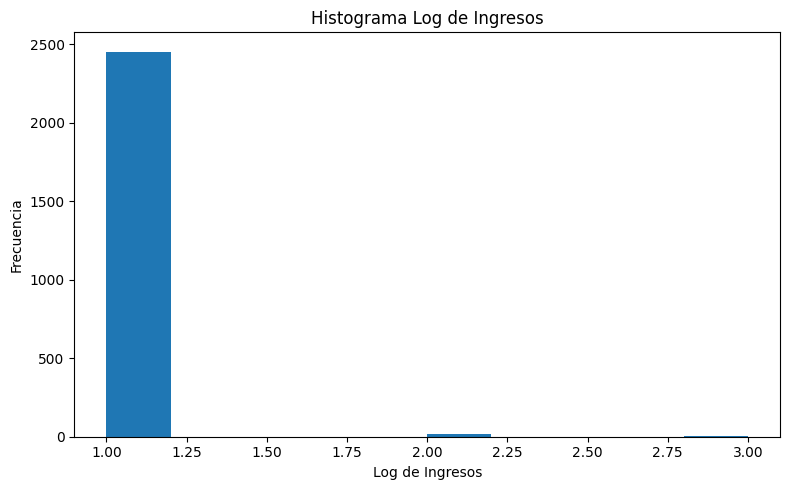

<Figure size 640x480 with 0 Axes>

In [19]:
preguntas.video_and_page(movies)

#### p. (4 puntos) ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla? 

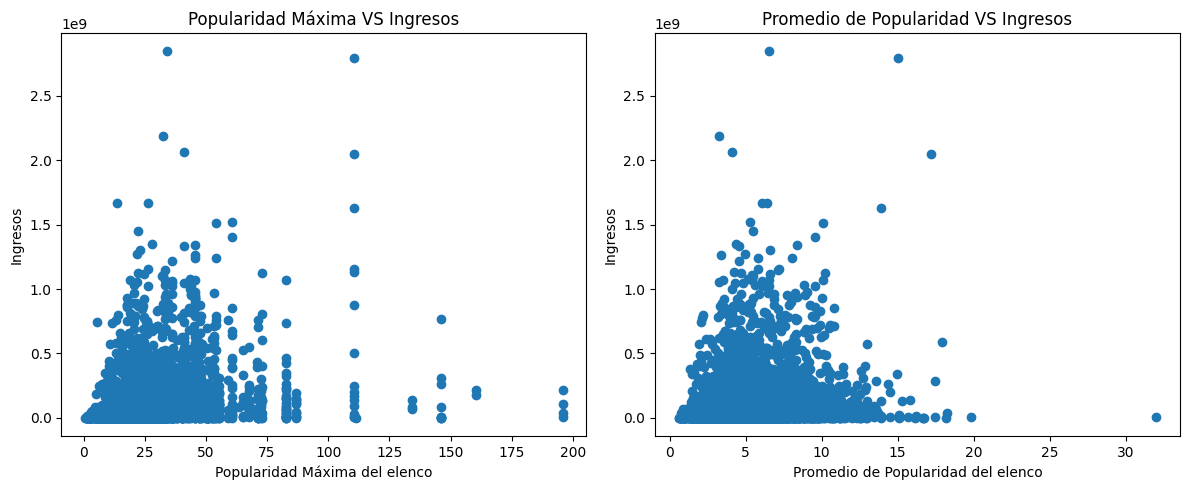

In [20]:
preguntas.actor_popularity(movies)